<center><h1>GROUP 6 </h1></center>

<center><h1><u> NLP PROJECT</u></h1></center>

# INTRODUCTION

L'objectif de ce projet est de construire un modèle capable de créer des résumés pertinents pour les documents français. 

a. Description: http://juanmanuel.torres.free.fr/corpus/rpm2/rpm2_resumes_fr.html

b. Dataset: http://juanmanuel.torres.free.fr/corpus/rpm2/download_resumes_fr.html

## Importation des librairies necessaires

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import heapq
from string import punctuation

In [2]:
path = "/home/aimssn/Téléchargements/NLP/Projet_nlp/Corpus_RPM2_resume/Corpus_RPM2_documents/"
filenames = sorted(glob.glob(path + "/*.txt"))
len(filenames)

400

## Exemple de text

In [3]:
f = open(filenames[0],'r')
contents = f.read()
print(contents)

﻿Libération d'Ingrid Betancourt: «Cesar» nie avoir trahi les Farc
L'homme chargé de la surveillance de l'ex-otage assure qu'il n'a pas trahi les Forces Armées Révolutionnaires de Colombie (Farc) contrairement aux accusations de la guerilla.
L'un des deux guérilleros des Farc capturés le 2 juillet lors de l'opération militaire de libération d'Ingrid Betancourt et de 14 autres otages a nié hier avoir trahi ses anciens compagnons.
Dans sa déclaration transmise à la justice, le guérillero "assure qu'à aucun moment il n'a trahi les Farc, et que tout le monde sait que la libération des 15 otages est le fruit d'une opération de renseignement militaire poussée, surtout dans l'interception des communications téléphoniques", a indiqué l'avocat.
L'opération de libération des otages, attribuée par le gouvernement colombien à une "opération de renseignement militaire impeccable", a permis d'arrêter les deux principaux responsables des Farc chargés de surveiller les otages, Gerardo Aguilar et Alexan

## Mettre les 400 fichiers dans un DataFrame.

In [4]:
table = []
for f in filenames:
    t=""""""
    text = open(f, "r", encoding="utf8")
    for line in text.readlines():
        t+=line
    text.close()
    table.append(t)
    
text = pd.DataFrame(table)
text.columns=['text']
text

,text
0,﻿Libération d'Ingrid Betancourt: «Cesar» nie a...
1,Betancourt: «L'opération a été impeccable» \n«...
2,﻿La libération d'Ingrid Betancourt continue de...
3,﻿Ingrid Betancourt est libre\nL'armée colombie...
4,﻿Ingrid Betancourt : questions sur une libérat...
...,...
395,La Chine multiplie les accusations contre le d...
396,Les touristes français se détournent de la Chi...
397,"Selon Amnesty, la répression en Chine s'est ag..."
398,Tibet - Des moines perturbent une visite de pr...


## Data Preprocessing

### Detection de la langue du texte

In [5]:
from langdetect import detect
lang = detect(contents)
print("La langue est: ", lang)

La langue est:  fr


### Suppression des caractères speciaux

In [6]:

def clean_text(text):
    row = re.sub(r"\\", " " ,text, flags=re.DOTALL)
    row = re.sub(r"\([^()]*\)", " ", row,flags=re.DOTALL) 
    row = re.sub(r"\n", " ", row,flags=re.DOTALL)
    return row

In [7]:
# Application de la fonction 'clean_text' à chaque ligne du Dataframe
text['text_clean1']=text['text'].map(lambda X: clean_text(X))
text

,text,text_clean1
0,﻿Libération d'Ingrid Betancourt: «Cesar» nie a...,﻿Libération d'Ingrid Betancourt: «Cesar» nie a...
1,Betancourt: «L'opération a été impeccable» \n«...,Betancourt: «L'opération a été impeccable» «L...
2,﻿La libération d'Ingrid Betancourt continue de...,﻿La libération d'Ingrid Betancourt continue de...
3,﻿Ingrid Betancourt est libre\nL'armée colombie...,﻿Ingrid Betancourt est libre L'armée colombien...
4,﻿Ingrid Betancourt : questions sur une libérat...,﻿Ingrid Betancourt : questions sur une libérat...
...,...,...
395,La Chine multiplie les accusations contre le d...,La Chine multiplie les accusations contre le d...
396,Les touristes français se détournent de la Chi...,Les touristes français se détournent de la Chi...
397,"Selon Amnesty, la répression en Chine s'est ag...","Selon Amnesty, la répression en Chine s'est ag..."
398,Tibet - Des moines perturbent une visite de pr...,Tibet - Des moines perturbent une visite de pr...


In [8]:
# print(text['text_clean1'][0])

### Analyse de la frequence des mots dans le texte

Text(0, 0.5, 'Probability')

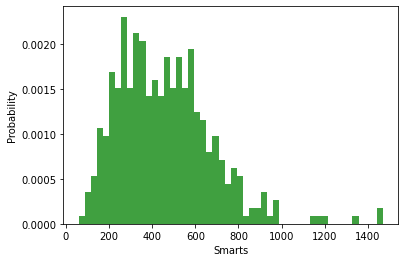

In [9]:
review_lens = text['text_clean1'].map(lambda x: len(x.split()))
n, bins, patches = plt.hist(review_lens, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')

### Supression des ponctuations et des mots reguliers (stopwords)

In [10]:
import spacy
nlp_fr = spacy.load('fr_core_news_sm') # Pour prendre en compte le vocabulaire francais.

In [11]:
# Definition de la fonction 'cleanup_text' pour enlever les pronoms personnels et stopwords
stopwords = stopwords.words('french')

def cleanup_text(docs, logging=False):
    
    texts = []
    doc = nlp_fr(docs)
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stopwords]
    tokens = ' '.join(tokens)
    texts.append(tokens)
    return " ".join(texts)

In [12]:
text['text_clean']=text['text_clean1'].map(lambda X: cleanup_text(X))
text

,text,text_clean1,text_clean
0,﻿Libération d'Ingrid Betancourt: «Cesar» nie a...,﻿Libération d'Ingrid Betancourt: «Cesar» nie a...,﻿libération ingrid betancourt : « cesar » nie ...
1,Betancourt: «L'opération a été impeccable» \n«...,Betancourt: «L'opération a été impeccable» «L...,betancourt : « opération avoir être impeccable...
2,﻿La libération d'Ingrid Betancourt continue de...,﻿La libération d'Ingrid Betancourt continue de...,﻿la libération ingrid betancourt continue susc...
3,﻿Ingrid Betancourt est libre\nL'armée colombie...,﻿Ingrid Betancourt est libre L'armée colombien...,﻿ingrid betancourt être libre armée colombien ...
4,﻿Ingrid Betancourt : questions sur une libérat...,﻿Ingrid Betancourt : questions sur une libérat...,﻿ingrid betancourt : question libération . co...
...,...,...,...
395,La Chine multiplie les accusations contre le d...,La Chine multiplie les accusations contre le d...,chine multiplier accusation contre dalaï - lam...
396,Les touristes français se détournent de la Chi...,Les touristes français se détournent de la Chi...,touriste français détournent chine chine faire...
397,"Selon Amnesty, la répression en Chine s'est ag...","Selon Amnesty, la répression en Chine s'est ag...","selon amnesty , répression chine être aggraver..."
398,Tibet - Des moines perturbent une visite de pr...,Tibet - Des moines perturbent une visite de pr...,tibet - moine perturber visite presse quinze m...


In [13]:
print('Reviews description with punctuation and stopwords---\n')
print(text['text_clean1'][0])
print('\nReviews description after removing  stopwrods---\n')
print(text['text_clean'][0])

Reviews description with punctuation and stopwords---

﻿Libération d'Ingrid Betancourt: «Cesar» nie avoir trahi les Farc L'homme chargé de la surveillance de l'ex-otage assure qu'il n'a pas trahi les Forces Armées Révolutionnaires de Colombie   contrairement aux accusations de la guerilla. L'un des deux guérilleros des Farc capturés le 2 juillet lors de l'opération militaire de libération d'Ingrid Betancourt et de 14 autres otages a nié hier avoir trahi ses anciens compagnons. Dans sa déclaration transmise à la justice, le guérillero "assure qu'à aucun moment il n'a trahi les Farc, et que tout le monde sait que la libération des 15 otages est le fruit d'une opération de renseignement militaire poussée, surtout dans l'interception des communications téléphoniques", a indiqué l'avocat. L'opération de libération des otages, attribuée par le gouvernement colombien à une "opération de renseignement militaire impeccable", a permis d'arrêter les deux principaux responsables des Farc chargés d

# I. Extractive Text Summarization

>* Ici, les phrases importantes sont sélectionnées dans le texte d'entrée pour former un résumé.

## 1. summary using spacy

In [14]:
def generate_summary(text_without_removing_dot, cleaned_text):
    
    sample_text = text_without_removing_dot
    doc = nlp_fr(sample_text)
    sentence_list=[]
    for idx, sentence in enumerate(doc.sents): # nous utilisons spacy pour la tokenization des phrases
        sentence_list.append(re.sub(r'[^\w\s]','',str(sentence)))

    stopwords = nltk.corpus.stopwords.words('french')
# Comptage de la frequence d'apparition des mots dans le cleaned_text qui ne sont pas dans le StopWord
    word_frequencies = {}  
    for word in nltk.word_tokenize(cleaned_text):  
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

    maximum_frequncy = max(word_frequencies.values())
    
# Frequence d'apparition de chaque mot
    for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)
        
#Evaluation du score de chaque phrase
    sentence_scores = {}  
    for sent in sentence_list:  
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 400:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]

# Selection des 3 phrases ayant les scores les plus eleves.
    summary_sentences = heapq.nlargest(3, sentence_scores, key=sentence_scores.get)
    
# Collection des phrases du resume
    summary = ' '.join(summary_sentences) 
    print("Original Text:\n")
    print(text_without_removing_dot)
    print('\n\nSummarized text:\n')
    print(summary)

**Test de la fonction generate_summary**

In [15]:
generate_summary(text['text_clean1'][0], text['text_clean'][0])

Original Text:

﻿Libération d'Ingrid Betancourt: «Cesar» nie avoir trahi les Farc L'homme chargé de la surveillance de l'ex-otage assure qu'il n'a pas trahi les Forces Armées Révolutionnaires de Colombie   contrairement aux accusations de la guerilla. L'un des deux guérilleros des Farc capturés le 2 juillet lors de l'opération militaire de libération d'Ingrid Betancourt et de 14 autres otages a nié hier avoir trahi ses anciens compagnons. Dans sa déclaration transmise à la justice, le guérillero "assure qu'à aucun moment il n'a trahi les Farc, et que tout le monde sait que la libération des 15 otages est le fruit d'une opération de renseignement militaire poussée, surtout dans l'interception des communications téléphoniques", a indiqué l'avocat. L'opération de libération des otages, attribuée par le gouvernement colombien à une "opération de renseignement militaire impeccable", a permis d'arrêter les deux principaux responsables des Farc chargés de surveiller les otages, Gerardo Aguila

### COMMENTAIRE:

**Apres application de la fonction "generate_summary" sur un texte, le resume obtenu est sans ponctuation et ne respecte pas certaines regles grammaticales.**

## 2. Summay using TF IDF

In [16]:
def summarization(textes):
    
    
    extra_words=list(stopwords)+list(punctuation)+['\n']
    docx = nlp_fr(textes)
#Supprimer les mots supplémentaires et obtenir le nombre de mots
    all_words=[word.text for word in docx]
    Freq_word={}
    for w in all_words:
        w1=w.lower()
        if w1 not in extra_words and w1.isalpha():
            if w1 in Freq_word.keys():
                Freq_word[w1]+=1
            else:
                Freq_word[w1]=1
    
    
    val=sorted(Freq_word.values())
    max_freq=val[-3:]
    for word in Freq_word.keys():  
        Freq_word[word] = (Freq_word[word]/max_freq[-1])
        
    
    val=sorted(Freq_word.values())
    max_freq=val[-3:]

    for word in Freq_word.keys():  
            Freq_word[word] = (Freq_word[word]/max_freq[-1])
    
# Sentence Strength
    sent_strength={}
    for sent in docx.sents:
        for word in sent :
            if word.text.lower() in Freq_word.keys():

                if sent in sent_strength.keys():
                    sent_strength[sent]+=Freq_word[word.text.lower()]
                else:

                    sent_strength[sent]=Freq_word[word.text.lower()]

            else:
                continue
    
    top_sentences=(sorted(sent_strength.values())[::-1])
    top30percent_sentence=int(0.3*len(top_sentences))
    top_sent=top_sentences[:top30percent_sentence]
# Obtention du resume
    summary=[]
    for sent,strength in sent_strength.items():  
        if strength in top_sent:
            summary.append(sent)

        else:
            continue
    for i in summary:
        print(i,end="")

In [33]:
summarization(text["text"][0])


Dans sa déclaration transmise à la justice, le guérillero "assure qu'à aucun moment il n'a trahi les Farc, et que tout le monde sait que la libération des 15 otages est le fruit d'une opération de renseignement militaire poussée, surtout dans l'interception des communications téléphoniques", a indiqué l'avocat.L'opération de libération des otages, attribuée par le gouvernement colombien à une "opération de renseignement militaire impeccable", a permis d'arrêter les deux principaux responsables des Farc chargés de surveiller les otages, Gerardo Aguilar et Alexander Farfan, alias "Enrique gafas ".

### COMMENTAIRE

**Compare au résumé pecedent, ce résumé prend en compte de ponctuation et est assez comprehensif** 

## 3. Summarization with LSA (Latent semantic analysis)

>* Il extrait les phrases sémantiquement significatives en appliquant la décomposition en valeurs singulières (SVD) à la matrice de fréquence des termes et des documents.

In [21]:
import sumy
# Analyse de la chaîne de texte en utilisant PlaintextParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

In [33]:
def lsa_sum(text):
    my_parser = PlaintextParser(text, Tokenizer('french'))
    # cree le resume
    lsa_summarizer=LsaSummarizer()
    lsa_summary= lsa_summarizer(my_parser.document,2)
    # affiche le resume
    for sentence in lsa_summary:
        print(sentence)

In [34]:
lsa_sum(text["text_clean1"][0])

Dans sa déclaration transmise à la justice, le guérillero "assure qu'à aucun moment il n'a trahi les Farc, et que tout le monde sait que la libération des 15 otages est le fruit d'une opération de renseignement militaire poussée, surtout dans l'interception des communications téléphoniques", a indiqué l'avocat.
Les deux guérilleros, qui ont également démenti avoir reçu de l'argent du gouvernement colombien, ont déjà fait l'objet de demandes d'extradition par les Etats-Unis, qui les accuse de l'enlèvement des trois citoyens américains Marc Gonsalves, Thomas Howes et Keith Stansell, retenus durant cinq ans et quatre mois.


# II. Abstractive Text Summarization

>* Le modèle forme ses propres expressions et phrases pour offrir un résumé plus cohérent, comme celui que produirait un humain.

### Summarization using pipeline

In [18]:
from transformers import pipeline

In [19]:
summarizer = pipeline("summarization")

In [24]:
def pipeline_summ(text):
    summarized = summarizer(text, min_length=75, max_length=500)
    return summarized

In [25]:
pipeline_summ(text["text_clean1"][0])

[{'summary_text': " L'homme chargé de la surveillance de l'ex-otage assure qu'il n'a pas trahi les Forces Armées Révolutionnaires de Colombie . L'opération de libération des otages, attribuée par le gouvernement colombien, a permis d'arrêter les deux principaux responsables des Farc chargés de surveiller ."}]

# CONCLUSION

En somme il etait question de resumer un ensemble de texte. Deux approches ont été mis en exergue a savoir la methode extractive et la methode abstraite. Il en ressort que d'une part le résumé extractif vise à identifier les informations saillantes, à les extraire et à les regrouper pour former un résumé. D'autre part Les textes résumés à l'aide de la methode abstraite semblent plus humains car elle génere de nouvelles phrases à partir d'informations extraites du corpus; de plus les résumés obtenus sont plus condensés.